In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

df = pd.read_csv("france_short_rates.csv")
us_df = pd.read_csv("us_short_rates.csv")

In [3]:
df.columns = ["Date", "France"]
us_df.columns = ["Date", "US"]
df["Date"] = pd.to_datetime(df["Date"])
us_df["Date"] = pd.to_datetime(us_df["Date"])


df.set_index("Date", inplace=True)
us_df.set_index("Date", inplace=True)

df = df.join(us_df, how="inner")


df.head()

,France,US
Date,,
1970-01-01,0.1035,0.0891
1970-02-01,0.0986,0.0858
1970-03-01,0.0955,0.0808
1970-04-01,0.0895,0.0751
1970-05-01,0.0902,0.0808


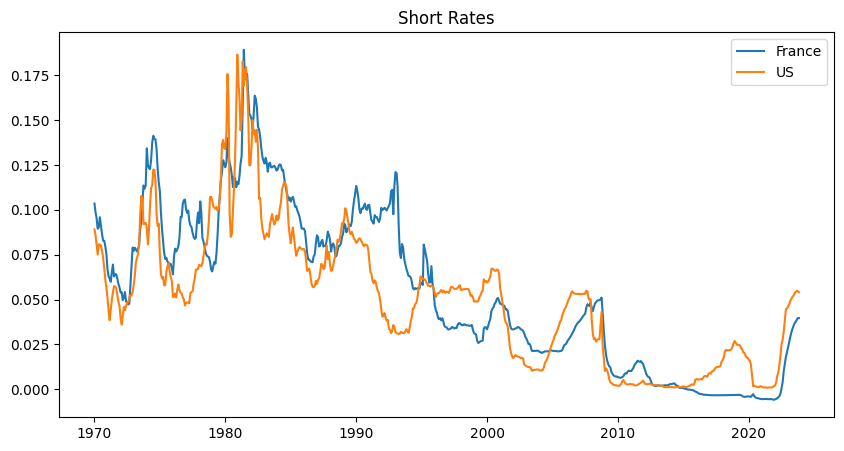

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df["France"], label="France")
plt.plot(df["US"], label="US")
plt.legend()
plt.title("Short Rates")
plt.show()

# Yield curve

- yield curve
- yield volatility

**For US Treasury bonds**

In [7]:
tickers = ['^IRX', '^FVX', '^TNX', '^TYX']  # 3-month, 5-year, 10-year, 30-year
df = yf.download(tickers, start="2000-01-01", end="2024-01-01")['Adj Close']

# Renaming columns
df.columns = ['3-Month', '5-Year', '10-Year', '30-Year']

df

[*********************100%%**********************]  4 of 4 completed


,3-Month,5-Year,10-Year,30-Year
Date,,,,
2000-01-03,6.457,5.270,6.548,6.598
2000-01-04,6.396,5.270,6.485,6.532
2000-01-05,6.489,5.270,6.599,6.631
2000-01-06,6.450,5.240,6.549,6.572
2000-01-07,6.397,5.220,6.504,6.537
...,...,...,...,...
2023-12-22,3.879,5.208,3.901,4.054
2023-12-26,3.875,5.203,3.886,4.043
2023-12-27,3.795,5.235,3.789,3.945


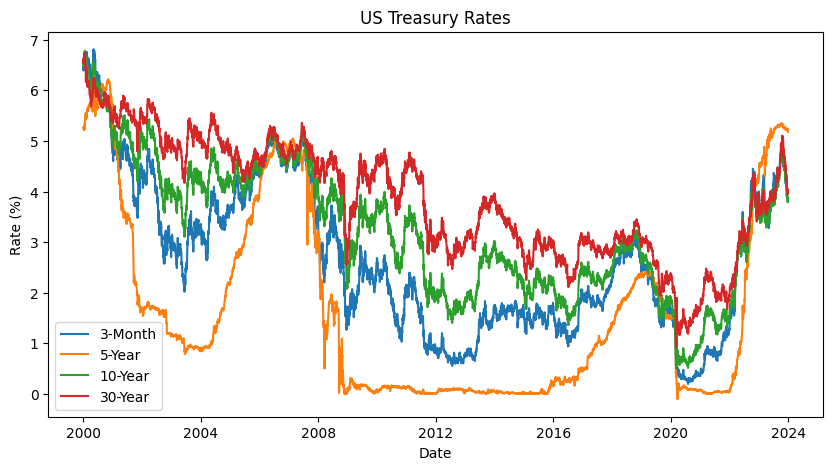

In [12]:
#plotting for the US treasury rates
plt.figure(figsize=(10, 5))
plt.plot(df["3-Month"], label="3-Month")
plt.plot(df["5-Year"], label="5-Year")
plt.plot(df["10-Year"], label="10-Year")
plt.plot(df["30-Year"], label="30-Year")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Rate (%)")
plt.title("US Treasury Rates")
plt.show()